# Práctica 1 - Perceptrón de Rosenblatt
## Introducción

Publicado por Rosenblantt en 1958<sup>[1][1]</sup>, el Perceptron es un algoritmo utilizado para el aprendizaje supervisado de clasificadores binarios. Los clasificadores binarios deciden si una entrada, generalmente representada por una serie de vectores, pertenece a una clase específica.

En resumen, un perceptrón es una red neuronal de una sola capa. Constan de cuatro partes principales que incluyen valores de entrada, pesos y sesgos, suma neta y una función de activación.<sup>[2][2]</sup>

![Perceptron de Rosenblatt](https://th.bing.com/th/id/R.1e2918ca88d5de8f7e1ebbff8bb4a534?rik=9H6mVUPDt%2fkKSg&riu=http%3a%2f%2fdataanalyticspost.com%2fwp-content%2fuploads%2f2017%2f03%2fRosenblattperceptron.png&ehk=WsI7AXwch%2fX%2f3BWpN5wZWdx%2bafhsRmN%2fsC%2f1opfOJ8s%3d&risl=&pid=ImgRaw&r=0 "Perceptron de Rosenblatt")

<!-- Referencias Introductorias -->

[1]: <https://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf> "Publicación original"
[2]: <https://deepai.org/machine-learning-glossary-and-terms/perceptron#:~:text=A%20Perceptron%20is%20an%20algorithm%20used%20for%20supervised,short%2C%20a%20perceptron%20is%20a%20single-layer%20neural%20network.> "Perceptron"
[3]: <https://es.wikipedia.org/wiki/Funci%C3%B3n_escal%C3%B3n_de_Heaviside> "Función escalonada"

## Implementación
### Importar librerías de código

En nuestro caso hemos reducido al mínimo el número de librerías de código a utilizar para esta práctica; en nuestro caso utilizamos las siguientes:

- <ins>Numpy</ins> &rarr; Es una librería numérica que trae el poder computacional de lenguajes como C y Fortran a Python. Utilizamos numpy para:
  - Utilizar arrays 🔲
  - Generar números aleatorios 🔢
  - Generar arrays a partir de distribuciones numéricas 📶
- <ins>Pandas</ins> &rarr; Es una librería de manipulación y análisis de datos de código abierto rápida, potente, flexible y fácil de usar, construida sobre el lenguaje de programación Python.
  - Abrir archivos .csv 📂
  - Dataframes 📅
  - Crear archivos .csv ✍
- <ins>Matplotlib</ins> &rarr; Es una librería para crear visualizaciones estáticas, animadas e interactivas en Python
  - Mostrar gráficos 📊
  - Tipo de renderizado `inline`

In [ ]:
# Librería numnérica
import numpy as np
# Librerías para estructuras de datos
import pandas as pd
# Librería gráfica
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline
# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

print('Versiones de las librerías con las que vamos a trabajar:')
print('\tNumpy\t\t\t>>> \tv', np.__version__)
print('\tPandas\t\t\t>>> \tv', pd.__version__)
print('\tMatplotlib\t\t>>> \tv', mplt.__version__)

Versiones de las librerías con las que vamos a trabajar:
	Numpy			>>> 	v 1.22.4
	Pandas			>>> 	v 1.4.4
	Matplotlib		>>> 	v 3.7.1


### Parámetros a rellenar
#### Matriz de Pesos
Sera un vector de 2 elementos, debido a que, más adelante, trabajaremos con 2 entradas en el apartado de Cuestiones.
Este vector se generará al azar con números en el rango de [-1, 1]

#### Entradas
En este caso, las entradas serán $x_1$ y $x_2$:

### Resolución AND

Para empezar con la resolución de la función and, primero debemos entender tanto la funcionalidad de la misma y del perceptron.

Tratemos primero la forma en la que las entradas se relacionan con las salidas; donde observamos que la única combinación para la que cambian las entradas es la última:

| $x_{1}$ | $x_{2}$ | $y$ |
|---------|---------|-----|
| 0       | 0       | 0   |
| 0       | 1       | 0   |
| 1       | 0       | 0   |
| 1       | 1       | 1   |

Esto lo podemos representar de la siguiente manera:

<figure>
    <img src="/assets/images/Forma_AND.png"
         alt="Forma AND">
    <figcaption>Visualización gráfica de una función lógica AND</figcaption>
</figure>

A partir de esto podemos ver que el problema es linealmente separable, debido a que podemos trazar una línea recta continua (que, debido a tratarse de un problema de clasificación multidimensional, denominamos hiperplano) para clasificar las salidas que pertenecen a grupos diferentes. Este hiperplano es representado por la siguiente función:

$$w_{1} x_{1} + w_{2}x_{2}-\theta=0$$

Donde:
- *$w_{i}$* &rarr; es el peso de la entrada n
- *$x_{i}$* &rarr; es la entrada
- *$\theta$* &rarr; es el umbral

Para comprobar el valor de una entrada, comprobamos que:

$$y=\begin{cases}
1, & \text{ si } w_{1} x_{1} + w_{2}x_{2}\geq\theta\\
0, & \text{ si } w_{1} x_{1} + w_{2}x_{2}<\theta\
\end{cases}$$

Teniendo todo esto en cuenta, lo que hacemos es entrenar la red con las entradas y salidas, corrigiendo la red cuando se equivoque (según la función de error: $error = y Esperada - yObtenida$)

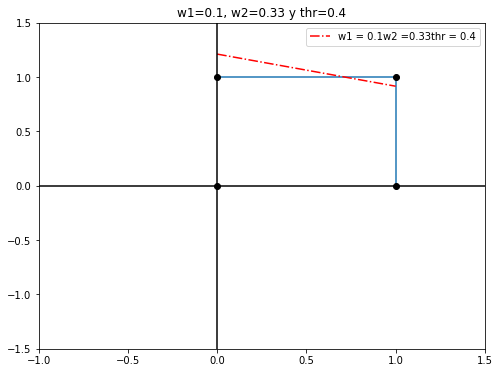

,x_1,x_2,Y_d,w_1,w_2,Y,e,w_1a,w_2a,iter
0,0.0,0.0,0.0,0.097622,0.430376,0.0,0.0,0.097622,0.430376,0.0_and
1,0.0,1.0,0.0,0.097622,0.430376,1.0,-1.0,0.097622,0.330376,1.0_and
2,1.0,0.0,0.0,0.097622,0.330376,0.0,0.0,0.097622,0.330376,2.0_and
3,1.0,1.0,1.0,0.097622,0.330376,1.0,0.0,0.097622,0.330376,3.0_and
4,0.0,0.0,0.0,0.097622,0.330376,0.0,0.0,0.097622,0.330376,4.0_and
5,0.0,1.0,0.0,0.097622,0.330376,0.0,0.0,0.097622,0.330376,5.0_and
6,1.0,0.0,0.0,0.097622,0.330376,0.0,0.0,0.097622,0.330376,6.0_and
7,1.0,1.0,1.0,0.097622,0.330376,1.0,0.0,0.097622,0.330376,7.0_and


In [ ]:
# Función escalon, como vista en los apuntes
def checkStepFunc(s_f,thr):
    if s_f < thr:
        s_r = 0
    else:
        s_r = 1
    return s_r

# Función para hacer un gráfico de
def _plot_hp(w1, w2, thr, w21=0, w22=0, thr_2=0):
    plt.figure(figsize=(8, 6))
    # Pintamos las lineas y puntos que recogen los límites del los valores a comprobar
    plt.scatter([0], [0], color="black", zorder=5)
    plt.scatter([0], [1], color="black", zorder=5)
    plt.scatter([1], [0], color="black", zorder=5)
    plt.scatter([1], [1], color="black", zorder=5)
    plt.vlines(x = 1, ymin = 0, ymax = 1)
    plt.hlines(y=1, xmin=0, xmax=1)
    plt.hlines(y=1, xmin=1, xmax=1)
    # En caso de que solo se introduzca un threshold
    if thr_2 == 0:
        thr_2 = thr
    x = np.array([0, 1])
    # Pintamos la linea del primer set
    plt.plot(x, (thr-(w1*x))/w2, 'r-.', label='w1 = ' + str(round(w1,2)) + 'w2 =' + str(round(w2,2)) +'thr = ' + str(round(thr,2)))
    plt.title('w1=' + str(round(w1,2)) + ', w2=' + str(round(w2,2)) +' y thr=' + str(round(thr,2)))
    # En caso de que se introduzca más de un set de pesos
    if not w21 == 0 and not w22 == 0:
        # Pintamos los pesos del segundo set
        plt.plot(x, (thr_2-(w21*x))/w22, 'b-.', label='w21=' + str(round(w21,2)) + ', w22=' + str(round(w22,2)) +' y thr=' + str(round(thr_2,2)))
        plt.title('w1=' + str(round(w1,2)) + ', w2=' + str(round(w2,2)) +' y thr=' + str(round(thr,2)) + '\nw21=' + str(round(w21,2)) + ', w22=' + str(round(w22,2)) +' y thr=' + str(round(thr_2,2)))
    # Pintamos las lineas de los ejes
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    # Limitamos el tamaño de visualización del gráfico
    plt.xlim([-1, 1.5])
    plt.ylim([-1.5, 1.5])
    # Mostramos la gráfica
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()
    return

# Función para probar una puerta lógica (devolver las predicciones)
def _tryFunc(w1,w2,thr):
    out = np.array([0,0,0,0])
    out[0] = checkStepFunc((w1*0+w2*0), thr)
    out[1] = checkStepFunc((w1*0+w2*1), thr)
    out[2] = checkStepFunc((w1*1+w2*0), thr)
    out[3] = checkStepFunc((w1*1+w2*1), thr)
    return out

# Función para entrenar una única función AND
def _trainAND(ep, lr, thr):
    # Vector de pesos de tamaño 2 con valores aleatorios entre -1 y 1
    # Como esta función devuelve un intervalo del tipo [min,max) añadimos los decimales a 1 para solucionarlo
    np.random.seed(0)
    w = np.random.uniform(size = 2, low = -1.00001, high = 1)
    # Entradas posibles para la función lógica
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    # Salidas esperadas para la función lógica
    s = np.array([0, 0, 0, 1])
    # Una matriz que devolvera los resultudos del entrenamiento, donde cada columna representa, respectivamente:
    # 0. Presentación
    # 1. Entrada x1
    # 2. Entrada x2
    # 3. Salida Esperada
    # 4. Peso w1
    # 5. Peso w2
    # 6. Salida Obtenida
    # 7. Error
    # 8. Peso w1 actualizado
    # 9. Peso w2 actualizado
    res = np.zeros((ep*len(s), 10))
    # Entrenamiento Iterativo
    for i in range(0,ep):

        # Error inicial para cada presentación
        err_t = 0

        # Presentación del dataset (en este caso la puerta lógica AND)
        for e in range(0,len(s)):
            iter = e+(i*len(s))
            res [iter][9] = iter
            res [iter][0] = entradas [e][0]
            res [iter][1] = entradas [e][1]
            res [iter][2] = s [e]
            res [iter][3] = w [0]
            res [iter][4] = w [1]

            # Hard Limiter (función escalón)
            res [iter][5] = checkStepFunc(np.sum(w*entradas[e, :]), thr) # w1*x1 + w2*x2 - thr = 0

            # Error de la presentación
            err = s[e] - res [iter][5]
            res [iter][6] = err
            # Modificar los pesos acorde al error y learning rate para la entrada
            # actual
            w = w + lr*err*entradas[e, :]
            res [iter][7] = w [0]
            res [iter][8] = w [1]

            err_t += abs(err)

        # Parada del entrenamiento cuando el error total sobre el dataset es 0
        if not err_t:
            res = res[0:(i*len(s)+len(s)),:]
            # Forzamos el fin de la función y devolvemos el array
            return res

    # Devolvemos el array
    return res

# Creamos un dataframe con los resultados según lo pedido en el enunciado de la práctica
df_and = pd.DataFrame(_trainAND(100, 0.1, 0.4),
            columns=['x_1', 'x_2', 'Y_d', 'w_1', 'w_2', 'Y', 'e', 'w_1a', 'w_2a', 'iter'])
# Modificamos los identificadores para diferenciar mejor las puertas
df_and['iter'] = df_and['iter'].astype(str) + '_and'
# Creamos la gráfica con los pesos obtenidos y el threshold introducido
_plot_hp(df_and.iloc[-1,7], df_and.iloc[-1,8], 0.4)
# Imprimimos el dataframe creado previamente al completo
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_and


### Resolución AND

Para empezar con la resolución de la función XOR, aplicamos la misma lógica que hemos aplicado al AND; siendo que en este caso las entradas son:

| $x_{1}$ | $x_{2}$ | $y$ |
|---------|---------|-----|
| 0       | 0       | 0   |
| 0       | 1       | 1   |
| 1       | 0       | 1   |
| 1       | 1       | 0   |

Por tanto, la forma de clasificarlo, podemos representarla gráficamente como:

<figure>
    <img src="/assets/images/Forma_XOR.png"
         alt="Forma XOR">
    <figcaption>Visualización gráfica de una función lógica XOR</figcaption>
</figure>

Viendo estas gráficas, podemos ver que la función XOR es un problema no linealmente separable, sabemos que el entrenamiento normal que hemos hecho con **AND** no funcionará, en cualquier caso, realizamos el entrenamiento.


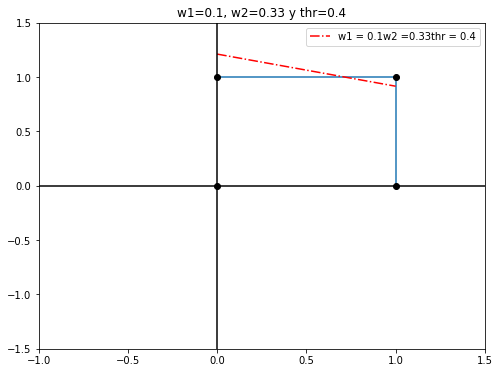

,x_1,x_2,Y_d,w_1,w_2,Y,e,w_1a,w_2a,iter
0,0.0,0.0,0.0,0.097622,0.430376,0.0,0.0,0.097622,0.430376,0.0_bad_xor
1,0.0,1.0,1.0,0.097622,0.430376,1.0,0.0,0.097622,0.430376,1.0_bad_xor
2,1.0,0.0,1.0,0.097622,0.430376,0.0,1.0,0.197622,0.430376,2.0_bad_xor
3,1.0,1.0,0.0,0.197622,0.430376,1.0,-1.0,0.097622,0.330376,3.0_bad_xor
4,0.0,0.0,0.0,0.097622,0.330376,0.0,0.0,0.097622,0.330376,4.0_bad_xor
5,0.0,1.0,1.0,0.097622,0.330376,0.0,1.0,0.097622,0.430376,5.0_bad_xor
6,1.0,0.0,1.0,0.097622,0.430376,0.0,1.0,0.197622,0.430376,6.0_bad_xor
7,1.0,1.0,0.0,0.197622,0.430376,1.0,-1.0,0.097622,0.330376,7.0_bad_xor
8,0.0,0.0,0.0,0.097622,0.330376,0.0,0.0,0.097622,0.330376,8.0_bad_xor
9,0.0,1.0,1.0,0.097622,0.330376,0.0,1.0,0.097622,0.430376,9.0_bad_xor


In [ ]:
# Función para "entrenar" una única función XOR
def _badTrainXOR(ep, lr, thr):
    # Vector de pesos de tamaño 2 con valores aleatorios entre -1 y 1
    # Como esta función devuelve un intervalo del tipo [min,max) añadimos los decimales a 1 para solucionarlo
    np.random.seed(0)
    w = np.random.uniform(size = 2, low = -1.00001, high = 1)
    # Entradas posibles para la función lógica
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    # Salidas esperadas para la función lógica
    s = np.array([0, 1, 1, 0])
    # Una matriz que devolvera los resultudos del entrenamiento, donde cada columna representa, respectivamente:
    # 0. Presentación
    # 1. Entrada x1
    # 2. Entrada x2
    # 3. Salida Esperada
    # 4. Peso w1
    # 5. Peso w2
    # 6. Salida Obtenida
    # 7. Error
    # 8. Peso w1 actualizado
    # 9. Peso w2 actualizado
    res = np.zeros((ep*len(s), 10))
    # Entrenamiento Iterativo
    for i in range(0,ep):

        # Error inicial para cada presentación
        err_t = 0

        # Presentación del dataset (en este caso la puerta lógica XOR)
        for e in range(0,len(s)):
            iter = e+(i*len(s))
            res [iter][9] = iter
            res [iter][0] = entradas [e][0]
            res [iter][1] = entradas [e][1]
            res [iter][2] = s [e]
            res [iter][3] = w [0]
            res [iter][4] = w [1]

            # Hard Limiter (función escalón)
            res [iter][5] = checkStepFunc(np.sum(w*entradas[e, :]), thr)

            # Error de la presentación
            err = s[e] - res [iter][5]
            res [iter][6] = err
            # Modificar los pesos acorde al error y learning rate para la
            # entrada actual
            w = w + lr*err*entradas[e, :]
            res [iter][7] = w [0]
            res [iter][8] = w [1]

            err_t += abs(err)

        # Parada del entrenamiento cuando el error total sobre el dataset es 0,
        # en el caso de la función xor sabemos que no se detendrá hasta haber
        # recorrido el número completo de iteraciones, debido a que el error
        # total nunca puede ser 0, porque estamos tratando un problema
        # linealmente no separable
        if not err_t:
            res = res[0:(i*len(s)+len(s)),:]
            # Forzamos el fin de la función y devolvemos el array
            return res

    # Devolvemos el array
    return res

# Repetimos el proceso de AND con XOR
df_bad_xor = pd.DataFrame(_badTrainXOR(100, 0.1, 0.4),
            columns=['x_1', 'x_2', 'Y_d', 'w_1', 'w_2', 'Y', 'e', 'w_1a', 'w_2a', 'iter'])
df_bad_xor['iter'] = df_bad_xor['iter'].astype(str) + '_bad_xor'
_plot_hp(df_bad_xor.iloc[-1,7], df_bad_xor.iloc[-1,8], 0.4)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_bad_xor


##### Posibles Resoluciones de un XOR

Si combinamos varias puertas lógicas, las posibles resolucioness de XOR son:

1. $\neg(\neg(x_{1}\land\neg(x_{1}\land x_{2}))\land\neg(x_{2}\land\neg(x_{1}\land x_{2})))$
2. $\neg(x_{1}\land x_{2})\land(x_{1}\lor x_{2})$
3. $(\neg x_{1}\land x_{2})\lor(x_{1}\land\neg x_{2})$

Realizaremos las 3 pero solo analizaremos la 3ª debido a su relativa facilidad de ser representada y para simplificar la explicación

Como necesitaremos la función OR para varias resoluciones, aplicamos de nuevo lo anterior:

| $x_{1}$ | $x_{2}$ | $y$ |
|---------|---------|-----|
| 0       | 0       | 0   |
| 0       | 1       | 1   |
| 1       | 0       | 1   |
| 1       | 1       | 1   |

Por tanto, la forma de clasificarlo, podemos representarla gráficamente como:

<figure>
    <img src="/assets/images/Forma_OR.png"
         alt="Forma OR">
    <figcaption>Visualización gráfica de una función lógica OR</figcaption>
</figure>



 Resolución XORs
1. 4 NAND:  [0 1 1 0]
1. NAND, OR y AND:  [0 1 1 0]
1. 2 AND y OR:  [0 1 1 0]




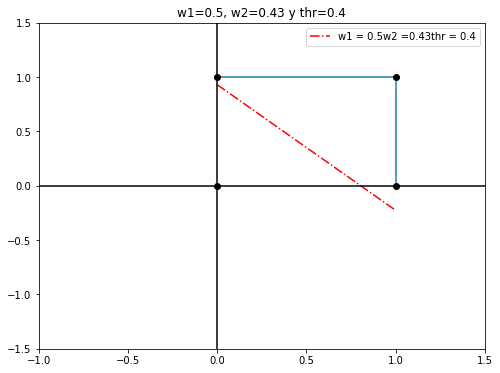

,x_1,x_2,Y_d,w_1,w_2,Y,e,w_1a,w_2a,iter
0,0.0,0.0,0.0,0.097622,0.430376,0.0,0.0,0.097622,0.430376,0.0_or
1,0.0,1.0,1.0,0.097622,0.430376,1.0,0.0,0.097622,0.430376,1.0_or
2,1.0,0.0,1.0,0.097622,0.430376,0.0,1.0,0.197622,0.430376,2.0_or
3,1.0,1.0,1.0,0.197622,0.430376,1.0,0.0,0.197622,0.430376,3.0_or
4,0.0,0.0,0.0,0.197622,0.430376,0.0,0.0,0.197622,0.430376,4.0_or
5,0.0,1.0,1.0,0.197622,0.430376,1.0,0.0,0.197622,0.430376,5.0_or
6,1.0,0.0,1.0,0.197622,0.430376,0.0,1.0,0.297622,0.430376,6.0_or
7,1.0,1.0,1.0,0.297622,0.430376,1.0,0.0,0.297622,0.430376,7.0_or
8,0.0,0.0,0.0,0.297622,0.430376,0.0,0.0,0.297622,0.430376,8.0_or
9,0.0,1.0,1.0,0.297622,0.430376,1.0,0.0,0.297622,0.430376,9.0_or


In [ ]:
# Función para "entrenar" una única función OR
def _trainOR(ep, lr, thr):
    # Vector de pesos de tamaño 2 con valores aleatorios entre -1 y 1
    # Como esta función devuelve un intervalo del tipo [min,max) añadimos los decimales a 1 para solucionarlo
    np.random.seed(0)
    w = np.random.uniform(size = 2, low = -1.00001, high = 1)
    # Entradas posibles para la función lógica
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    # Salidas esperadas para la función lógica
    s = np.array([0, 1, 1, 1])
    # Una matriz que devolvera los resultudos del entrenamiento, donde cada columna representa, respectivamente:
    # 0. Presentación
    # 1. Entrada x1
    # 2. Entrada x2
    # 3. Salida Esperada
    # 4. Peso w1
    # 5. Peso w2
    # 6. Salida Obtenida
    # 7. Error
    # 8. Peso w1 actualizado
    # 9. Peso w2 actualizado
    res = np.zeros((ep*len(s), 10))
    # Entrenamiento Iterativo
    for i in range(0,ep):

        # Error inicial para cada presentación
        err_t = 0

        # Presentación del dataset (en este caso la puerta lógica XOR)
        for e in range(0,len(s)):
            iter = e+(i*len(s))
            res [iter][9] = iter
            res [iter][0] = entradas [e][0]
            res [iter][1] = entradas [e][1]
            res [iter][2] = s [e]
            res [iter][3] = w [0]
            res [iter][4] = w [1]

            # Hard Limiter (función escalón)
            res [iter][5] = checkStepFunc(np.sum(w*entradas[e, :]), thr)

            # Error de la presentación
            err = s[e] - res [iter][5]
            res [iter][6] = err
            # Modificar los pesos acorde al error y learning rate para la
            # entrada actual
            w = w + lr*err*entradas[e, :]
            res [iter][7] = w [0]
            res [iter][8] = w [1]

            err_t += abs(err)

        # Parada del entrenamiento cuando el error total sobre el dataset es 0
        if not err_t:
            res = res[0:(i*len(s)+len(s)),:]
            # Forzamos el fin de la función y devolvemos el array
            return res

    # Devolvemos el array
    return res

# Posibles resoluciones del XOR utilizando diferentes puertas lógicas,
# como se especifica en la cabezera de esta celda

# 4 Puertas NAND
def _resultXOR_1(wAND_1,wAND_2, thr):
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    s = np.array([0, 0, 0, 0])
    # Realizamos el cálculo para cada entrada
    for e in range(0,4):
        res_NAND_1 = not checkStepFunc(wAND_1*entradas[e][0]+wAND_2*entradas[e][1], thr)
        res_NAND_2 = not checkStepFunc(wAND_1*entradas[e][0]+wAND_2*res_NAND_1, thr)
        res_NAND_3 = not checkStepFunc(wAND_1*res_NAND_1+wAND_2*entradas[e][1], thr)
        res_NAND_4 = not checkStepFunc(wAND_1*res_NAND_2+wAND_2*res_NAND_3, thr)
        s[e] = res_NAND_4
    # Devolvemos las soluciones
    return s

# 1 puerta NAND, 1 puerta OR y 1 puerta AND
def _resultXOR_2(wAND_1,wAND_2,wOR_1,wOR_2, thr):
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    s = np.array([0, 0, 0, 0])
    # Realizamos el cálculo para cada entrada
    for e in range(0,4):
        res_NAND = not checkStepFunc(wAND_1*entradas[e][0]+wAND_2*entradas[e][1], thr)
        res_OR = checkStepFunc(wOR_1*entradas[e][0]+wOR_2*entradas[e][1], thr)
        res_AND = checkStepFunc(wAND_1*res_OR+wAND_2*res_NAND, thr)
        s[e] = res_AND
    # Devolvemos las soluciones
    return s

# 2 puertas AND con 1 entrada invertida y 1 puerta OR
def _resultXOR_3(wAND_1,wAND_2,thr,wOR_1,wOR_2, thr2 = 0):
    if thr2 == 0:
        thr2 = thr
    entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    s = np.array([0, 0, 0, 0])
    # Realizamos el cálculo para cada entrada
    for e in range(0,4):
        res_AND_1 = checkStepFunc(wAND_1*(not entradas[e][0])+wAND_2*entradas[e][1], thr)
        res_AND_2 = checkStepFunc(wAND_1*entradas[e][0]+wAND_2*(not entradas[e][1]), thr)
        res_OR = checkStepFunc(wOR_1*res_AND_1+wOR_2*res_AND_2, thr)
        s[e] = res_OR
    # Devolvemos las soluciones
    return s


# Repetimos el proceso de AND y XOR con OR
df_or = pd.DataFrame(_trainOR(100, 0.1, 0.4),
            columns=['x_1', 'x_2', 'Y_d', 'w_1', 'w_2', 'Y', 'e', 'w_1a', 'w_2a', 'iter'])
# Además, mostramos los resultados de las 3 posibles funciones reslutorias de XOR
print('\n Resolución XORs\n===================')
print('1. 4 NAND: ', _resultXOR_1(df_and.iloc[-1,7],df_and.iloc[-1,8],0.4))
print('1. NAND, OR y AND: ', _resultXOR_2(df_and.iloc[-1,7],df_and.iloc[-1,8],df_or.iloc[-1,7],df_or.iloc[-1,8],0.4))
print('1. 2 AND y OR: ', _resultXOR_3(df_and.iloc[-1,7],df_and.iloc[-1,8],0.4,df_or.iloc[-1,7],df_or.iloc[-1,8]))
print('\n')
_plot_hp(df_or.iloc[-1,7], df_or.iloc[-1,8], 0.4)
df_or['iter'] = df_or['iter'].astype(str) + '_or'
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_or

## Encontrar Mejor Configuración

Características para conseguir el mínimo número de iteraciones para AND



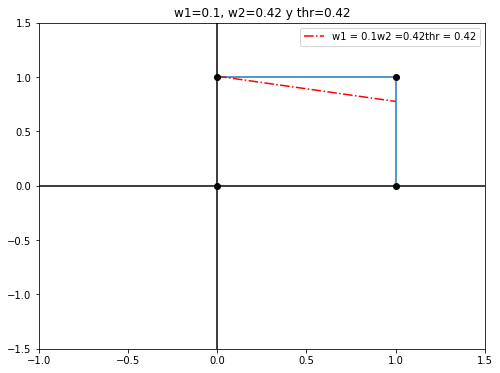


Iteraciones = 2.0
Learning rate =  0.01
Threshold =  0.4235353535353536


Características para conseguir el mínimo número de iteraciones para OR



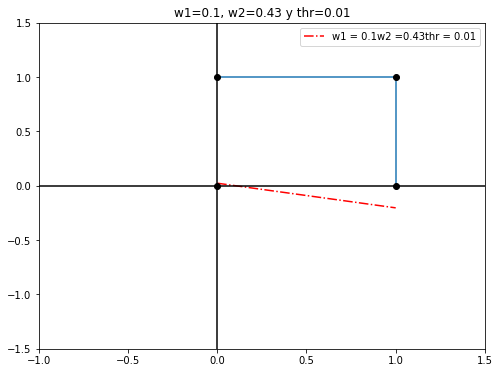


Iteraciones = 1.0
Learning rate =  0.01
Threshold =  0.01


In [ ]:
def fastest_AND(lr_min, lr_max, thr_min, thr_max):
  # Generar datos
    learning_rate = np.linspace(lr_min,lr_max,100)
    threshold = np.linspace(thr_min,thr_max,100)
    # Configuración final y entrenamiento de la función AND
    conf_fin = ([0,0])
    res_a = np.zeros((400, 10))
    # Buscar la mejor configuración
    for i in range(0, len(learning_rate)):
        for j in range(0, len(threshold)):
            and_res = _trainAND(100, learning_rate [i], threshold [j])
            # Para la primera iteración
            if (i == 0 and j == 0) or (and_res.shape[0] > 4 and and_res.shape[0] < res_a.shape[0]):
                conf_fin [0] = learning_rate[i]
                conf_fin [1] = threshold[j]
                res_a = np.copy(and_res)
    return conf_fin, res_a

def fastest_OR(lr_min, lr_max, thr_min, thr_max):
  # Generar datos
    learning_rate = np.linspace(lr_min,lr_max,100)
    threshold = np.linspace(thr_min,thr_max,100)
    # Configuración final y entrenamiento de la función AND
    conf_fin = ([0,0])
    res_o = np.zeros((400, 10))
    # Buscar la mejor configuración
    for i in range(0, len(learning_rate)):
        for j in range(0, len(threshold)):
            or_res = _trainOR(100, learning_rate [i], threshold [j])
            # Para la primera iteración
            if i == 0 and j == 0 or (or_res.shape[0] > 4 and or_res.shape[0] < res_o.shape[0]):
                conf_fin [0] = learning_rate[i]
                conf_fin [1] = threshold[j]
                res_o = np.copy(or_res)
    return conf_fin, res_o

x_and, y_and = fastest_AND(0.01,0.9,0.01,0.9)

print('Características para conseguir el mínimo número de iteraciones para AND')
print('=======================================================================\n')
_plot_hp(y_and[-1,7], y_and[-1,8], x_and[1])
print('=======================================================================\n')
print('Iteraciones =', y_and.shape[0]/4)
print('Learning rate = ', x_and[0])
print('Threshold = ', x_and[1])

x_or, y_or = fastest_OR(0.01,0.9,0.01,0.9)

print('\n\nCaracterísticas para conseguir el mínimo número de iteraciones para OR')
print('=======================================================================\n')
_plot_hp(y_or[-1,7], y_or[-1,8], x_or[1])
print('=======================================================================\n')
print('Iteraciones =', y_or.shape[0]/4)
print('Learning rate = ', x_or[0])
print('Threshold = ', x_or[1])



Características para conseguir el mínimo número de iteraciones para OR



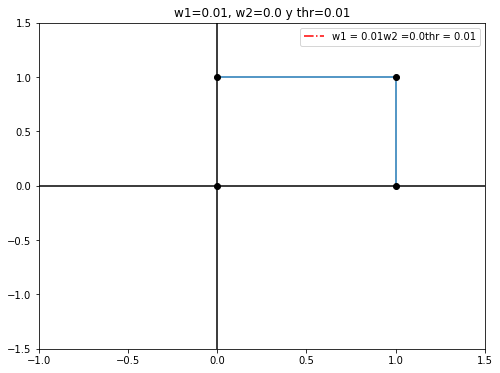


Iteraciones = 100.0
Learning rate =  0.01
Learning rate =  0.01


In [ ]:
def fastest_bad_XOR(lr_min, lr_max, thr_min, thr_max):
  # Generar datos
    learning_rate = np.linspace(lr_min,lr_max,100)
    threshold = np.linspace(thr_min,thr_max,100)
    # Configuración final y entrenamiento de la función AND
    conf_fin = ([0,0])
    res_x = np.zeros((400, 10))
    # Buscar la mejor configuración
    for i in range(0, len(learning_rate)):
        for j in range(0, len(threshold)):
            xor_res = _badTrainXOR(100, learning_rate [i], threshold [j])
            # Para la primera iteración
            if i == 0 and j == 0 or (xor_res.shape[0] > 4 and xor_res.shape[0] < res_x.shape[0]):
                conf_fin [0] = learning_rate[i]
                conf_fin [1] = threshold[j]
                res_x = np.copy(xor_res)
    return conf_fin, res_x


x_xor, y_xor =  fastest_bad_XOR(0.01,0.9,0.01,0.9)

print('\n\nCaracterísticas para conseguir el mínimo número de iteraciones para OR')
print('=======================================================================\n')
_plot_hp(y_xor[-1,7], y_xor[-1,8], x_xor[1])
print('=======================================================================\n')
print('Iteraciones =', y_xor.shape[0]/4)
print('Learning rate = ', x_xor[0])
print('Learning rate = ', x_xor[1])

### Guardar Datos en CSV

In [ ]:
# Guardamos los datos de AND
df_and_fast = pd.DataFrame(y_and,
            columns=['x_1', 'x_2', 'Y_d', 'w_1', 'w_2', 'Y', 'e', 'w_1a', 'w_2a', 'iter'])
# Los organizamos
df_and_fast['iter'] = df_and_fast['iter'].astype(str) + '_and'
# Repetimos el proceso con OR
df_or_fast = pd.DataFrame(y_or,
            columns=['x_1', 'x_2', 'Y_d', 'w_1', 'w_2', 'Y', 'e', 'w_1a', 'w_2a', 'iter'])
df_or_fast['iter'] = df_or_fast['iter'].astype(str) + '_or'
# Y de nuvo, repetimos el proceso con XOR
df_bad_xor_fast = pd.DataFrame(y_xor,
            columns=['x_1', 'x_2', 'Y_d', 'w_1', 'w_2', 'Y', 'e', 'w_1a', 'w_2a', 'iter'])
df_bad_xor_fast['iter'] = df_bad_xor_fast['iter'].astype(str) + '_xor'
# Guadramos los datos de AND, XOR y OR en un dataframe
df_csv = pd.concat([pd.concat([df_and_fast, df_or_fast]), df_bad_xor_fast]).reset_index()
columna_inicial = df_csv.pop('iter')
df_csv.insert(0, 'iter', columna_inicial)
# Guardamos dicho dataframe en un csv
df_csv.to_csv("L2P1-Perceptron.csv", index = False)
# Mostramos los 20 primeros elementos del dataframe
df_csv

,iter,index,x_1,x_2,Y_d,w_1,w_2,Y,e,w_1a,w_2a
0,0.0_and,0,0.0,0.0,0.0,0.097622,0.430376,0.0,0.0,0.097622,0.430376
1,1.0_and,1,0.0,1.0,0.0,0.097622,0.430376,1.0,-1.0,0.097622,0.420376
2,2.0_and,2,1.0,0.0,0.0,0.097622,0.420376,0.0,0.0,0.097622,0.420376
3,3.0_and,3,1.0,1.0,1.0,0.097622,0.420376,1.0,0.0,0.097622,0.420376
4,4.0_and,4,0.0,0.0,0.0,0.097622,0.420376,0.0,0.0,0.097622,0.420376
5,5.0_and,5,0.0,1.0,0.0,0.097622,0.420376,0.0,0.0,0.097622,0.420376
6,6.0_and,6,1.0,0.0,0.0,0.097622,0.420376,0.0,0.0,0.097622,0.420376
7,7.0_and,7,1.0,1.0,1.0,0.097622,0.420376,1.0,0.0,0.097622,0.420376
8,0.0_or,0,0.0,0.0,0.0,0.097622,0.430376,0.0,0.0,0.097622,0.430376
9,1.0_or,1,0.0,1.0,1.0,0.097622,0.430376,1.0,0.0,0.097622,0.430376


## Otra Interpretación

A partir de este punto, hemos planteado una hipótesis acerca de la precisión del perceptron para este tipo de problemas (puertas lógicas); para ella nos hemos fijado en los diferentes resultados y precisión a la que puede llegar un modelo según los resultados o usos de la función (particularmente a la hora de realizar el XOR, que es lo que analizaremos a continuación).

Nuestra hipótesis se basa en que cuanto más se acerquen los valores de las funciones AND y OR a los puntos rojos y azules, respectivamente, representados en el gráfico, más consistente será nuestra solución.

Esto lo comprobaremos más adelante, depués de haber visto que los valores de las funciones que se acercan demasiado a los puntos que queremos clasificar, ya sea por arriba o por abajo, pueden presentar un mayor número de irreguaridades.

Antes de llegar a esta conclusión; habiamos planteado analizar los resultados mediante:
+ La distancia entre las lineas 📏
+ La distancia entre una linea y un punto intermedio entre los 3 valores que delimita 📐
+ La similitud entre las pendientes de las lineas ⛰


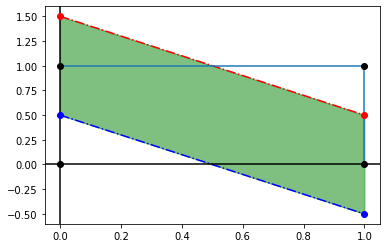

In [ ]:
# Mostramos un gráfico que representa nuestra hipotesis acerca
# del control de errores.

# Puntos a los que acercarnos (para AND)
plt.scatter([0], [1.5], color="red", zorder=5)
plt.scatter([1], [0.5], color="red", zorder=5)
# Puntos a los que acercarnos (para OR)
plt.scatter([0], [0.5], color="blue", zorder=5)
plt.scatter([1], [-0.5], color="blue", zorder=5)
# Imprimimos las lineas
x = np.array([0, 1])
y1 = np.array([1.5, 0.5])
y2 = np.array([0.5, -0.5])
plt.plot(x, y1, 'r-.')
plt.plot(x, y2, 'b-.')
# Rellenamos el espacio entre las lineas (valores de XOR)
plt.fill_between(x, y1, y2, color='green', alpha=0.5)
# Pintar los ejes y limites de los datos a clasificar
plt.scatter([0], [0], color="black", zorder=5)
plt.scatter([0], [1], color="black", zorder=5)
plt.scatter([1], [0], color="black", zorder=5)
plt.scatter([1], [1], color="black", zorder=5)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.vlines(x = 1, ymin = 0, ymax = 1)
plt.hlines(y=1, xmin=0, xmax=1)
plt.hlines(y=1, xmin=1, xmax=1)
# Pintar el gráfico
plt.show()

#### Encontrar las mejores funciones lógicas

En las funciones a continuación, buscamos el valor ideal de configuración para la hipótesis que hemos planteado

In [ ]:
# Función sin uso actual que nos permite calcular la diferencia entre las
# pendientes de 2 funciones. Hemos dejado de lado esta forma de comprobar el XOR
def check_Slopes(w1,w2,thr,w21,w22,thr2 = 0):
    if thr2 == 0:
        thr2 = thr
    slope_1 = (-(w1/w2)*0)+(thr/w2) - (-(w1/w2)*1)+(thr/w2)
    slope_2 = (-(w21/w22)*0)+(thr2/w22) - (-(w21/w22)*1)+(thr2/w22)
    slope_diff = (slope_1-slope_2)/slope_1
    return abs(slope_diff)

# Para encontrar los mejores pesos de AND, tratamos de encontrar la combinación
# de resultados que se aproxime más a los puntos vistos anteriormente en la
# gráfica de hipótesis, que son (0, 1.5) y (1, 0.5)
def _bestAND(lr_min, lr_max, thr_min, thr_max):
    # Generar datos
    learning_rate = np.linspace(lr_min,lr_max,20)
    threshold = np.linspace(thr_min,thr_max,20)
    # Configuración final y entrenamiento de la función AND
    conf_fin = ([0,0,0,0])
    res_a = np.zeros((400, 10))
    # Buscar la mejor configuración
    for i in range(0, len(learning_rate)):
        for j in range(0, len(threshold)):
            and_res = _trainAND(100, learning_rate [i], threshold [j])
            # Predicciones de las entradas
            y_x0 = (threshold[j])/and_res[-1,8]
            y_x1 = (threshold[j]-and_res[-1,7])/and_res[-1,8]
            # Para la primera iteración
            if i == 0 and j == 0:
                conf_fin [0] = y_x0
                conf_fin [1] = y_x1
                res_a = np.copy(and_res)
            # Comprobamos que las predicciones están en el rango definido
            elif (y_x0 > 1 and y_x0 <= 1.5 and y_x1 > 0 and y_x1 <= 0.5):
                # Comprobamos que las predicciones de esta iteración son mejores que las almacenadas
                if (conf_fin [0] < y_x0 and conf_fin [1] < y_x1) or (conf_fin [0] > 1.5 and conf_fin [1] < 0):
                    conf_fin [0] = y_x0
                    conf_fin [1] = y_x1
                    conf_fin [2] =  i
                    conf_fin [3] =  j
                    res_a = np.copy(and_res)
    # Hacemos una última comprobación
    if conf_fin [0] > 1 and conf_fin [1] > 0 and conf_fin [1] < 1:
        lr_fin = learning_rate[conf_fin [2]]
        thr_fin = threshold[conf_fin [3]]
        conf_fin [2] = lr_fin
        conf_fin [3] = thr_fin
        return conf_fin, res_a
    # En caso de error
    else:
        conf_fin = 0
        res_a = 0
        return conf_fin, res_a

# En el caso del XOR, tratamos de encontrar la combinación
# de resultados que se aproxime más a los puntos vistos anteriormente en la
# gráfica de hipótesis, que son (0, 0.5) y (1, -0.5); además, el entrenamiento
# de AND está incluido en esta función mediante una llamada a la anterior.
def _bestXOR(lr_min, lr_max, thr_min, thr_max):
    # Generar datos
    learning_rate = np.linspace(lr_min,lr_max,20)
    threshold = np.linspace(thr_min,thr_max,20)
    # Configuración final y entrenamiento de la función XOR
    conf_fin = ([0,0,0,0])
    conf_and,and_res = _bestAND(lr_min,lr_max,thr_min,thr_max)
    # Nos aseguramos de haber obtenido un buen modelo de AND
    while(conf_and == 0):
        conf_and,and_res = _bestAND(lr_min,lr_max,thr_min,thr_max)
    res_o = np.zeros((400, 10))
    # Buscar la mejor configuración
    for i in range(0, len(learning_rate)):
        for j in range(0, len(threshold)):
            or_res = _trainOR(100, learning_rate[i], threshold[j])
            # Predicciones de las entradas
            y_x0 = (threshold[j])/or_res[-1,8]
            y_x1 = (threshold[j]-or_res[-1,7])/or_res[-1,8]
            # Para la primera iteración
            if i == 0 and j == 0:
                conf_fin [0] = y_x0
                conf_fin [1] = y_x1
                res_o = np.copy(or_res)
            # Comprobamos que las predicciones están en el rango definido
            elif (y_x0 > 0 and y_x0 <= 0.5 and y_x1 >= -0.5 and y_x1 < 0):
                # Comprobamos si las predicciones de esta iteración son mejores que las almacenadas
                if (conf_fin [0] < y_x0 and conf_fin [1] > y_x1) or (conf_fin [0] > 0.5 and conf_fin [1] < -0.5):
                    conf_fin [0] = y_x0
                    conf_fin [1] = y_x1
                    conf_fin [2] =  i
                    conf_fin [3] =  j
                    res_o = np.copy(or_res)
    # Hacemos una última comprobación
    if conf_fin [0] > 0 and conf_fin [0] < 1 and conf_fin [1] < 0:
        lr_fin_o = learning_rate[conf_fin [2]]
        thr_fin_o = threshold[conf_fin [3]]
        conf_fin [2] = lr_fin_o
        conf_fin [3] = thr_fin_o
        return conf_fin, conf_and, res_o, and_res
    # En caso de error
    else:
        conf_fin = 0
        conf_and = 0
        res_o = 0
        and_res = 0
        return conf_fin, conf_and, res_o, and_res




* Función AND *

[0 0 0 1]
> Configuración para AND <
Learning Rate: 0.15052631578947367
Threshold: 0.38473684210526315
_

> Gráfica AND <



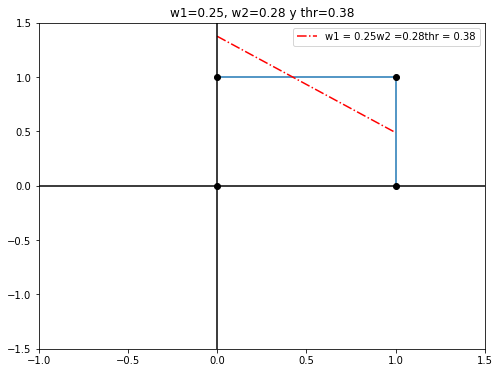


* Función XOR *

[0 1 1 0]
> Configuración para OR <
Learning Rate: 0.26789473684210524
Threshold: 0.19052631578947368
_

> Configuración para AND <
Learning Rate: 0.16473684210526315
Threshold: 0.13894736842105262
_

> Gráfica XOR <



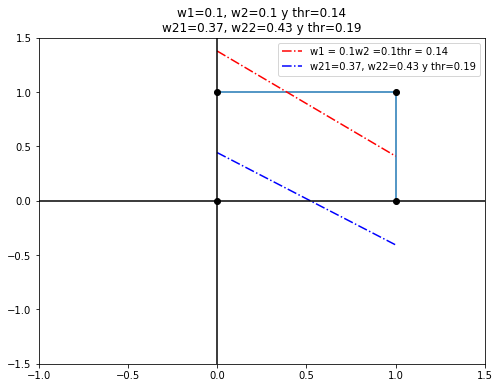

In [ ]:
# Obtenemos la configuración y entrenamiento de AND
c_and_alone, _and_alone = _bestAND(0.01,0.9,0.01,0.9)
# Nos aseguramos de haber obtenido un buen modelo de AND
if c_and_alone != 0:
    out_and_alone = _tryFunc(_and_alone[-1,7], _and_alone[-1,8], c_and_alone[3])
while(c_and_alone == 0 or not np.array_equiv(out_and_alone, np.array([0,0,0,1]))):
        c_and_alone, _and_alone = _bestAND(0.01,0.9,0.01,0.9)
        if c_and_alone != 0:
            out_and_alone = _tryFunc(_and_alone[-1,7], _and_alone[-1,8], c_and_alone[3])

# Imprimimos los resultados
print('\n* Función AND *\n')
print(out_and_alone)
print('> Configuración para AND <')
print('Learning Rate: ' + str(c_and_alone[2]) + '\nThreshold: ' + str(c_and_alone[3]))
print('_\n')
print('> Gráfica AND <\n')
_plot_hp(_and_alone[-1,7],_and_alone[-1,8],c_and_alone[3])

print('==========================================================================\n')

# Para el mejor XOR, aplicamos lo visto ya en el AND para centrarnos en los valores necesarios para el OR
c_or, c_and, _or, _and = _bestXOR(0.01,0.5,0.01,0.5)
# Nos aseguramos de haber obtenido un buen modelo de AND
if c_and_alone != 0:
            out_or = _tryFunc(_or[-1,7],_or[-1,8],c_or[3])
            out_and = _tryFunc(_and[-1,7],_and[-1,8],c_and[3])
            out_xor = _resultXOR_3(_and[-1,7],_and[-1,8],c_and[3],_or[-1,7],_or[-1,8],c_or[3])
while(c_or == 0 or not np.array_equiv(out_or, np.array([0,1,1,1])) or not np.array_equiv(out_and, np.array([0,0,0,1])) or not np.array_equiv(out_xor, np.array([0,1,1,0]))):
        c_or, c_and, _or, _and = _bestXOR(0.01,0.5,0.01,0.5)
        if c_and_alone != 0:
            out_or = _tryFunc(_or[-1,7],_or[-1,8],c_or[3])
            out_and = _tryFunc(_and[-1,7],_and[-1,8],c_and[3])
            out_xor = _resultXOR_3(_and[-1,7],_and[-1,8],c_and[3],_or[-1,7],_or[-1,8],c_or[3])

# Imprimimos los resultados
print('* Función XOR *\n')
print(out_xor)
print('> Configuración para OR <')
print('Learning Rate: ' + str(c_or[2]) + '\nThreshold: ' + str(c_or[3]))
print('_\n')
print('> Configuración para AND <')
print('Learning Rate: ' + str(c_and[2]) + '\nThreshold: ' + str(c_and[3]))
print('_\n')
print('> Gráfica XOR <\n')
_plot_hp(_and[-1,7],_and[-1,8],c_and[3],_or[-1,7],_or[-1,8],c_or[3])